# Visualizing Data

# Contents:

1. Setup
2. `matplotlib`
3. `seaborn`
4. `plotly`

## Data

The specific file names are:
- bike_thefts_joined.csv
- neighbourhoods.csv

## Supporting packages and data

Let's import `numpy` and `pandas` and load up some data to work with.

In [2]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

In [3]:
# load data
thefts_joined = pd.read_csv('../data/bike_thefts_joined.csv',
                           dtype={'n_id': str})
neighbourhoods = pd.read_csv('../data/neighbourhoods.csv',
                            dtype={'n_id': str})

# fix dates
thefts_joined['occurrence_date'] = pd.to_datetime(thefts_joined['occurrence_date'])
thefts_joined['report_date'] = pd.to_datetime(thefts_joined['report_date'])

In [4]:
thefts_joined.head()

,_id,objectid,event_unique_id,primary_offence,occurrence_date,occurrence_year,occurrence_month,occurrence_dayofweek,occurrence_dayofmonth,occurrence_dayofyear,occurrence_hour,report_date,report_year,report_month,report_dayofweek,report_dayofmonth,report_dayofyear,report_hour,division,city,hood_id,neighbourhoodname,location_type,premises_type,bike_make,bike_model,bike_type,bike_speed,bike_colour,bike_cost,status,objectid2,geometry,neighbourhood,n_id,designation,pop_2016,pop_2011,pop_change,private_dwellings,occupied_dwllings,pop_dens,area,total_commuters,drive,car_passenger,transit,walk,bike,other,pct_bike
0,1,17744,GO-20179016397,THEFT UNDER,2017-10-03,2017,October,Tuesday,3,276,14,2017-10-03,2017,October,Tuesday,3,276,18,D22,Toronto,15,Kingsway South (15),"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,GI,ESCAPE 2,OT,7,BLK,700.0,STOLEN,1,"{'type': 'Point', 'coordinates': (-79.50655965...",Kingsway South,15,No Designation,9271.0,9170.0,0.011,3710.0,3584.0,3593.0,2.58,3735.0,2210.0,120.0,1185.0,115.0,30.0,50.0,0.008032
1,2,17759,GO-20172033056,THEFT UNDER - BICYCLE,2017-11-08,2017,November,Wednesday,8,312,3,2017-11-08,2017,November,Wednesday,8,312,22,D22,Toronto,15,Kingsway South (15),"Single Home, House (Attach Garage, Cottage, Mo...",House,UNKNOWN MAKE,NaN,TO,1,BLK,1100.0,RECOVERED,2,"{'type': 'Point', 'coordinates': (-79.50484874...",Kingsway South,15,No Designation,9271.0,9170.0,0.011,3710.0,3584.0,3593.0,2.58,3735.0,2210.0,120.0,1185.0,115.0,30.0,50.0,0.008032
2,3,17906,GO-20189030822,THEFT UNDER - BICYCLE,2018-09-14,2018,September,Friday,14,257,9,2018-09-17,2018,September,Monday,17,260,16,D22,Toronto,15,Kingsway South (15),Ttc Subway Station,Transit,OT,CROSSTRAIL,MT,24,BLK,904.0,STOLEN,3,"{'type': 'Point', 'coordinates': (-79.51170915...",Kingsway South,15,No Designation,9271.0,9170.0,0.011,3710.0,3584.0,3593.0,2.58,3735.0,2210.0,120.0,1185.0,115.0,30.0,50.0,0.008032
3,4,17962,GO-2015804467,THEFT UNDER,2015-05-07,2015,May,Thursday,7,127,18,2015-05-14,2015,May,Thursday,14,134,14,D22,Toronto,15,Kingsway South (15),Ttc Subway Station,Transit,GT,NaN,TO,10,BLKDGR,400.0,STOLEN,4,"{'type': 'Point', 'coordinates': (-79.51170915...",Kingsway South,15,No Designation,9271.0,9170.0,0.011,3710.0,3584.0,3593.0,2.58,3735.0,2210.0,120.0,1185.0,115.0,30.0,50.0,0.008032
4,5,17963,GO-20159002781,THEFT UNDER,2015-05-16,2015,May,Saturday,16,136,12,2015-05-16,2015,May,Saturday,16,136,15,D22,Toronto,15,Kingsway South (15),Ttc Subway Station,Transit,GI,NaN,MT,6,RED,600.0,STOLEN,5,"{'type': 'Point', 'coordinates': (-79.51132657...",Kingsway South,15,No Designation,9271.0,9170.0,0.011,3710.0,3584.0,3593.0,2.58,3735.0,2210.0,120.0,1185.0,115.0,30.0,50.0,0.008032


In [5]:
# exclude the City of Toronto
neighbourhoods = neighbourhoods.loc[neighbourhoods['neighbourhood'] != 'City of Toronto']
neighbourhoods.head()

,neighbourhood,n_id,designation,pop_2016,pop_2011,pop_change,private_dwellings,occupied_dwllings,pop_dens,area,total_commuters,drive,car_passenger,transit,walk,bike,other,pct_bike
0,Agincourt North,129,No Designation,29113,30279,-0.039,9371,9120,3929,7.41,11820,7155,930,3350,265,70,45,0.005922
1,Agincourt South-Malvern West,128,No Designation,23757,21988,0.080,8535,8136,3034,7.83,10160,6135,665,2985,280,35,65,0.003445
2,Alderwood,20,No Designation,12054,11904,0.013,4732,4616,2435,4.95,6045,4090,355,1285,195,65,65,0.010753
3,Annex,95,No Designation,30526,29177,0.046,18109,15934,10863,2.81,14910,3290,290,6200,3200,1675,225,0.112341
4,Banbury-Don Mills,42,No Designation,27695,26918,0.029,12473,12124,2775,9.98,11395,7150,500,2945,615,65,140,0.005704


In [6]:
# add new columns showing % of commuters for each mode
def calc_pct(mode):
    return round(mode/neighbourhoods['total_commuters'], 3)

# new column names
pct_cols = ['pct_drive', 'pct_cp', 'pct_transit', 'pct_walk']
neighbourhoods[pct_cols] = neighbourhoods.loc[:, 'drive':'walk'].apply(calc_pct)
#.apply() applies a function along an axis of the DataFrame

# Overview

## Data visualization in Python

So far, we have gotten data, wrangled it, and scratched the surface of exploratory analyses. As part of that exploration, we created charts with `pandas`. However, there are dedicated visualization libraries let us customize our charts further.

# `matplotlib`

## `matplotlib`

`matplotlib` is _the_ foundational data visualization library in Python. `pandas`'s visualization functions are, at their core,  `matplotlib` functions. Other popular libraries like `seaborn` similarly build on `matplotlib`.

For historical reasons, when we import `matplotlib`, we really import `matplotlib.pyplot`. The conventional alias is `plt`.

In [7]:
# jupyter-specific "magic" command to render plots in-line
%matplotlib inline

import matplotlib.pyplot as plt

## Anatomy of a plot

`matplotlib` visuals consist of one or more Axes in a Figure. An _Axes_, confusingly, is what we would consider a graph, while the _Figure_ is a container for those graphs. An Axes has an x-_Axis_ and a y-_Axis_.

More details can be found at: https://matplotlib.org/stable/tutorials/introductory/quick_start.html

## Plotting with `matplotlib`

`matplotlib` provides two ways to create visualizations:
* by having **`pyplot`** automatically create and manage Figures and Axes, keeping track of which Figure and Axes we are currently working on
* by taking an **object-oriented approach**, where we explicitly create Figures and Axes and modify them

The object-oriented approach is recommended, but the `pyplot` approach is convenient for quick plots.

## `pyplot`-style plotting

`pyplot`-style plotting is convenient for quick, exploratory plots, where we don't plan on doing a lot of customization. When we plotted data in `pandas`, `pandas` took this approach. Let's plot the neighbourhood data with the `pyplot` approach. `plot()` produces a line plot by default.

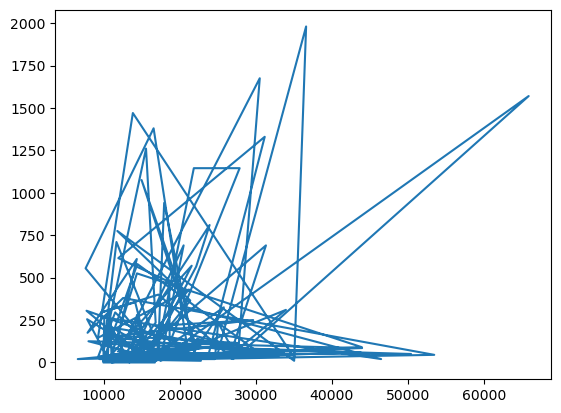

In [8]:
plt.plot(neighbourhoods['pop_2016'],
         neighbourhoods['bike'])

Let's make it a scatterplot instead with the `scatter()` function.
We can use keyword arguments like `facecolor` and `edgecolor` to change the styling. `matplotlib` lets us specify colour with RGB(A) tuples, hexadecimal strings, single-character shortcodes, and [even xkcd colours](https://matplotlib.org/stable/tutorials/colors/colors.html).

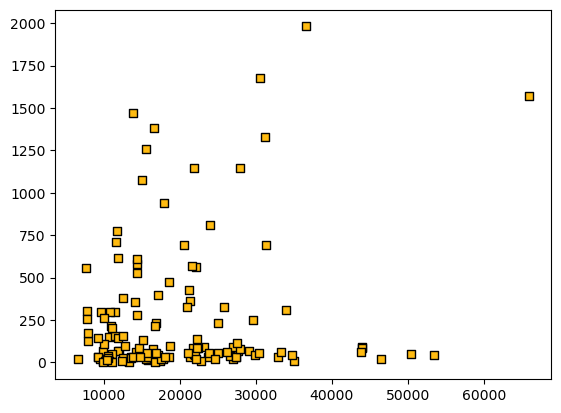

In [9]:
plt.scatter(neighbourhoods['pop_2016'],
            neighbourhoods['bike'],
            marker='s',  # square marker
            facecolor='#fb1',
            edgecolor='k') # black

Using the `pyplot` approach, the outputs of successive function calls in the same cell context are layered on. Let's layer driving and biking commuter counts and add a legend.

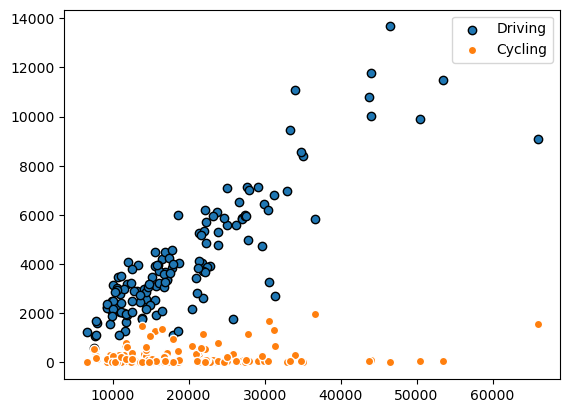

In [10]:
plt.scatter(neighbourhoods['pop_2016'],
            neighbourhoods['drive'],
            edgecolor='k',
            label='Driving')
plt.scatter(neighbourhoods['pop_2016'],
            neighbourhoods['bike'],
            edgecolor='w',
            label='Cycling')
plt.legend()

Calls in a different cell are treated as a new Axes.

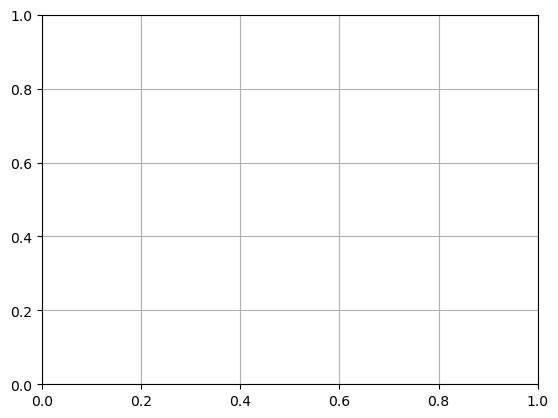

In [11]:
plt.grid()

## Object-oriented approach to plotting

The object-oriented approach is the preferred method of plotting with `matplotlib`. In this approach, we use the `subplots()` function to create plot objects, then call methods to modify them.

By default, `subplots()` returns one Figure and one Axes. We can use Python's unpacking syntax to assign the Figure and Axes to their own variables in one line.

<class 'matplotlib.figure.Figure'>, <class 'matplotlib.axes._axes.Axes'>


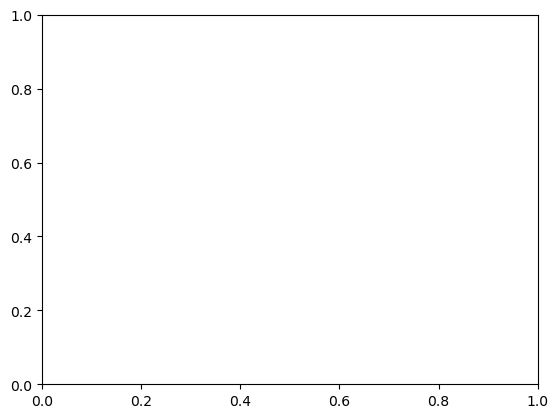

In [12]:
fig, ax = plt.subplots()
print(f'{type(fig)}, {type(ax)}')

The Axes is empty. Let's plot data on it with the Axes `scatter()` method. This method updates `ax` with a scatterplot. To make it easier to refer to each scatterplot later, we assign the outputs to their own variables, `drivers` and `cyclists`.

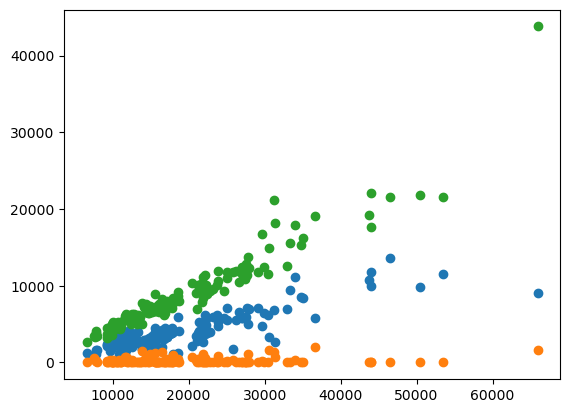

In [13]:
drivers = ax.scatter(neighbourhoods['pop_2016'],
           neighbourhoods['drive'])
cyclists = ax.scatter(neighbourhoods['pop_2016'],
           neighbourhoods['bike'])
total = ax.scatter(neighbourhoods['pop_2016'],
                  neighbourhoods['total_commuters'])
fig

## Adding labels, a title, and grid

This graph doesn't give much context. To add a title, we can use the Axes `set_title()` method, which takes the title as a string, plus optional arguments like `fontsize`. Similarly, we can set x and y labels with the `set_xlabel()` and `set_ylabel()` methods. Finally, let's add a grid with the Axes `grid()` method, and use the `alpha` parameter to make it translucent. We'll also use the `set_axisbelow()` method to make sure markers draw over the grid.

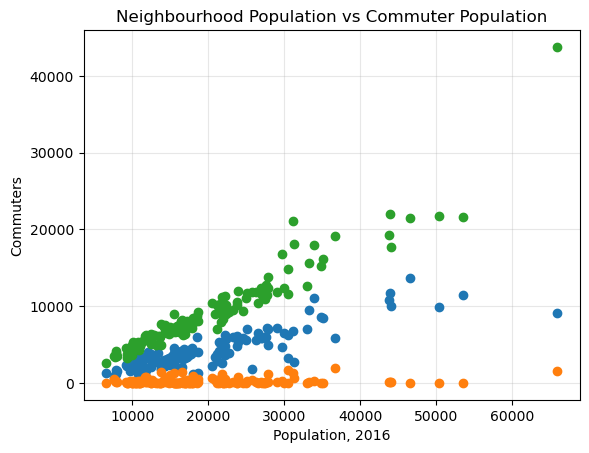

In [14]:
ax.set_title('Neighbourhood Population vs Commuter Population')
ax.set_xlabel('Population, 2016')
ax.set_ylabel('Commuters')
ax.set_axisbelow(True)
ax.grid(alpha=0.3)
fig

## Adding a legend

This graph could use a legend. To add one, we call the Axes `legend()` method. If we passed a `label` argument in the `scatter()` calls, `legend()` would use those labels. However, because we did not, we pass a list of the geometries to use in the legend, plus a list of labels to show.

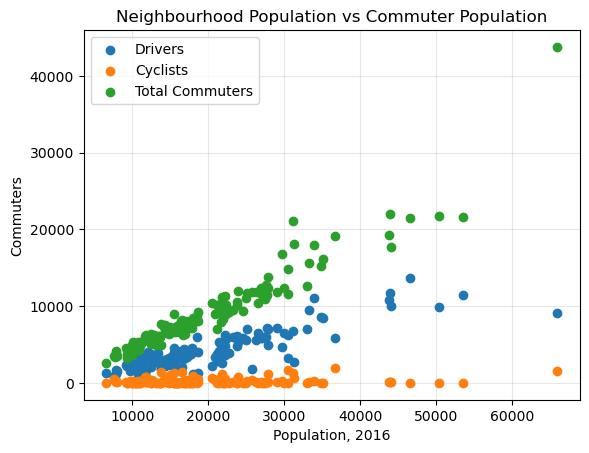

In [15]:
ax.legend([drivers, cyclists, total],
          ['Drivers', 'Cyclists', 'Total Commuters'])
fig

To place the legend outside the Axes, we can pass a tuple with the `bbox_to_anchor` argument. The legend's `loc` corner will be placed at the coordinates in the `bbox_to_anchor` tuple.

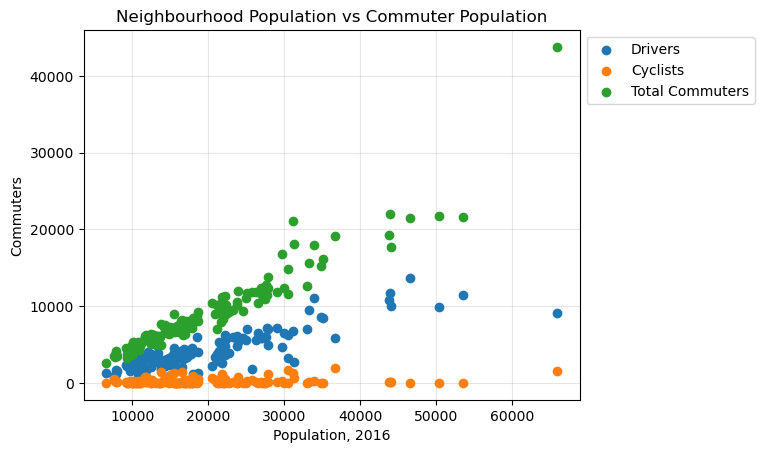

In [16]:
ax.legend([drivers, cyclists, total],
          ['Drivers', 'Cyclists', 'Total Commuters'],
          bbox_to_anchor=(1, 1),
          loc='upper left')
fig

## Modifying axis ticks

We can change how the x-axis and y-axis are formatted by accessing an Axes `xaxis` and `yaxis` attributes and calling methods like `set_ticks()` or `set_major_formatter()`.

Some configurations of Python and `matplotlib` allow us to pass a format string by itself to `set_major_formatter()`. Older versions require that we import `matplotlib`'s `ticker` submodule and create a `StrMethodFormatter` with the format string we want to use.

In [17]:
import matplotlib.ticker as tick

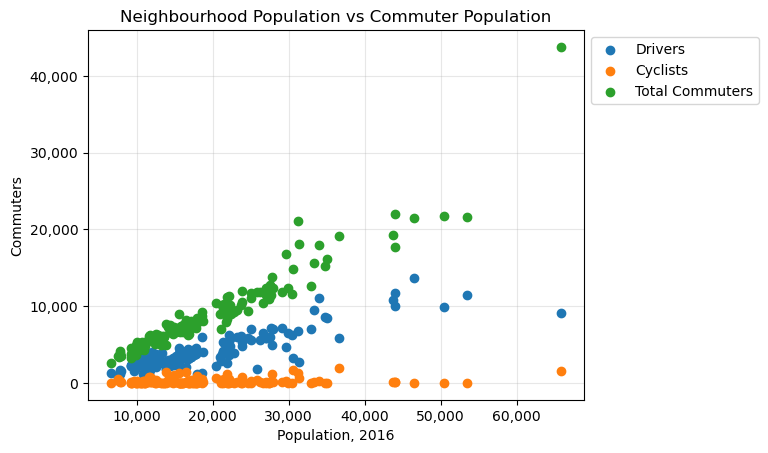

In [18]:
# label with a thousands place comma and zero decimal places
ax.xaxis.set_major_formatter(tick.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(tick.StrMethodFormatter('{x:,.0f}'))
# %:, use comma as thousand separator
# .0f zero decimal places
fig

We can also change axis limits.

In [19]:
#ax.xaxis.set_ticks(np.arange(0, max(neighbourhoods['pop_2016']+10), 10000))

In [20]:
ax.axis()

(3610.2, 68879.8, -2189.25, 45974.25)

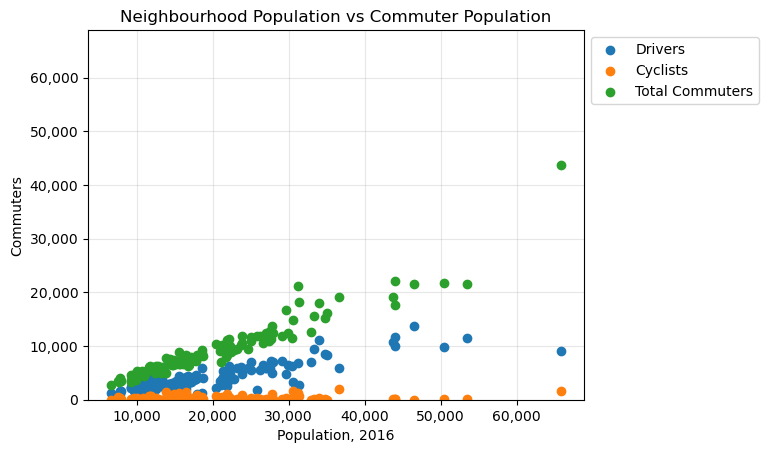

In [21]:
ax.set(ylim=(0, ax.axis()[1])) # make the y-axis match the x-axis
fig

## Changing styles

`matplotlib` comes with a bunch of predefined styles. We can view the available ones with `plt.style.available`. Passing one of the options to `style.use()` makes it the aesthetic style for all new plots. **Already created Figures and Axes are not affected.**

In [22]:
plt.style.available[5:10]  # print a subset

['classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot']

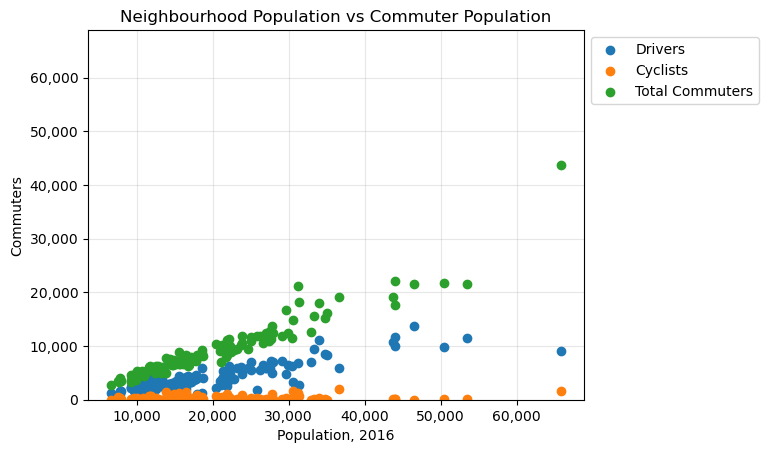

In [23]:
# set style for new plots
plt.style.use('fivethirtyeight')

# notice that the style of fig did not change
fig

## Other plot types

Of course, `matplotlib` offers more than just line plots and scatterplots. Among the many kinds of plots we can make are bar plots, histograms, and boxplots. To create each the object-oriented way, we call the appropriate Axes method, like `Axes.boxplot()` or `Axes.barh()`, for a horizontal bar plot.

In [24]:
# review the neighbourhoods data
neighbourhoods.head()

,neighbourhood,n_id,designation,pop_2016,pop_2011,pop_change,private_dwellings,occupied_dwllings,pop_dens,area,total_commuters,drive,car_passenger,transit,walk,bike,other,pct_bike,pct_drive,pct_cp,pct_transit,pct_walk
0,Agincourt North,129,No Designation,29113,30279,-0.039,9371,9120,3929,7.41,11820,7155,930,3350,265,70,45,0.005922,0.605,0.079,0.283,0.022
1,Agincourt South-Malvern West,128,No Designation,23757,21988,0.080,8535,8136,3034,7.83,10160,6135,665,2985,280,35,65,0.003445,0.604,0.065,0.294,0.028
2,Alderwood,20,No Designation,12054,11904,0.013,4732,4616,2435,4.95,6045,4090,355,1285,195,65,65,0.010753,0.677,0.059,0.213,0.032
3,Annex,95,No Designation,30526,29177,0.046,18109,15934,10863,2.81,14910,3290,290,6200,3200,1675,225,0.112341,0.221,0.019,0.416,0.215
4,Banbury-Don Mills,42,No Designation,27695,26918,0.029,12473,12124,2775,9.98,11395,7150,500,2945,615,65,140,0.005704,0.627,0.044,0.258,0.054


In [25]:
# get just the 10 biggest neighbourhoods to plot
top10_pop = neighbourhoods.sort_values('pop_2016', ascending=False).head(10)
top10_pop

,neighbourhood,n_id,designation,pop_2016,pop_2011,pop_change,private_dwellings,occupied_dwllings,pop_dens,area,total_commuters,drive,car_passenger,transit,walk,bike,other,pct_bike,pct_drive,pct_cp,pct_transit,pct_walk
123,Waterfront Communities-The Island,77,No Designation,65913,43361,0.520,47209,40756,8943,7.37,43785,9100,760,10915,20855,1570,610,0.035857,0.208,0.017,0.249,0.476
133,Woburn,137,NIA,53485,53350,0.003,19098,18436,4345,12.31,21595,11505,1405,7635,780,45,210,0.002084,0.533,0.065,0.354,0.036
130,Willowdale East,51,No Designation,50434,45041,0.120,23901,22304,10087,5.00,21785,9890,695,9390,1550,50,215,0.002295,0.454,0.032,0.431,0.071
106,Rouge,131,No Designation,46496,45912,0.013,13730,13389,1260,36.89,21500,13665,1510,5935,220,20,160,0.000930,0.636,0.070,0.276,0.010
66,L'Amoreaux,117,Emerging Neighbourhood,43993,44919,-0.021,15486,15037,6144,7.16,17715,10005,1220,5895,370,85,120,0.004798,0.565,0.069,0.333,0.021
59,Islington-City Centre West,14,No Designation,43965,38084,0.154,19911,19328,2712,16.21,22055,11775,975,8205,795,90,195,0.004081,0.534,0.044,0.372,0.036
74,Malvern,132,Emerging Neighbourhood,43794,45086,-0.029,13936,13426,4948,8.85,19225,10785,1400,6425,425,60,115,0.003121,0.561,0.073,0.334,0.022
33,Dovercourt-Wallace Emerson-Junction,93,No Designation,36625,34631,0.058,16248,15320,9819,3.73,19090,5825,820,8950,1215,1980,310,0.103719,0.305,0.043,0.469,0.064
34,Downsview-Roding-CFB,26,NIA,35052,34659,0.011,14244,13121,2337,15.00,16165,8405,1060,6085,460,10,145,0.000619,0.520,0.066,0.376,0.028
96,Parkwoods-Donalda,45,No Designation,34805,34617,0.005,13921,13315,4691,7.42,15270,8580,820,5275,420,45,115,0.002947,0.562,0.054,0.345,0.028


Text(0.5, 0, 'Population, 2016')

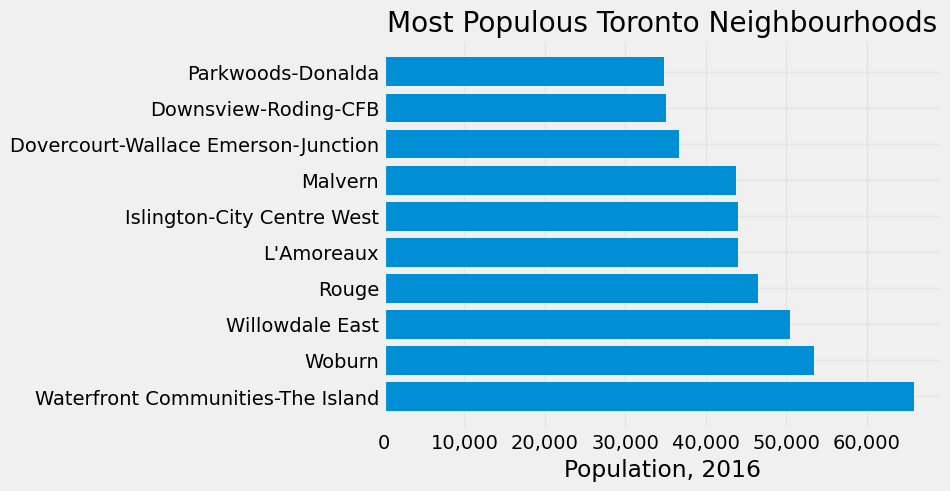

In [26]:
bar_fig, bar_ax = plt.subplots()
bar_ax.barh(top10_pop['neighbourhood'], top10_pop['pop_2016'])
bar_ax.xaxis.set_major_formatter(tick.StrMethodFormatter('{x:,.0f}'))
bar_ax.set_axisbelow(True)
bar_ax.grid(alpha=0.3)
bar_ax.set_title('Most Populous Toronto Neighbourhoods')
bar_ax.set_xlabel('Population, 2016')

Text(0.5, 1.0, 'Neighbourhood Commuter Modes')

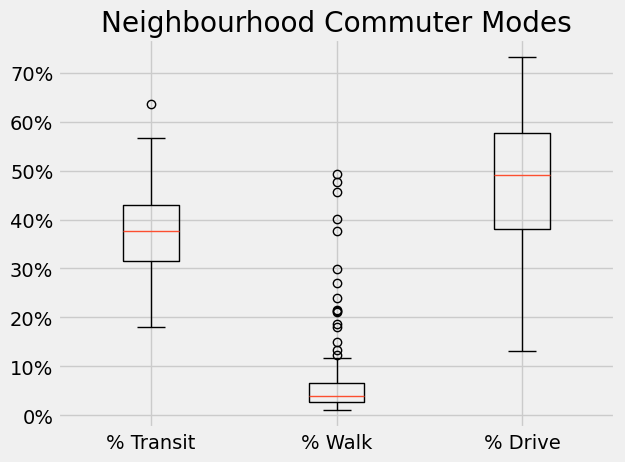

In [27]:
# create a box plot
box_fig, box_ax = plt.subplots()
box_ax.boxplot([neighbourhoods['pct_transit'],
                neighbourhoods['pct_walk'],
                neighbourhoods['pct_drive']],
               # add labels so we know which box is which var
              labels=['% Transit', '% Walk', '% Drive'])
box_ax.yaxis.set_major_formatter(tick.StrMethodFormatter('{x:.0%}'))
# percentage format
box_ax.set_title('Neighbourhood Commuter Modes')

Text(0, 0.5, '# of Neighbourhoods')

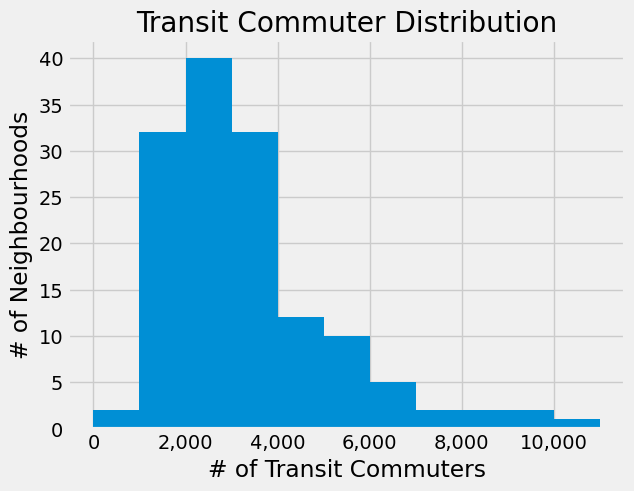

In [28]:
# create a histogram
hist_fig, hist_ax = plt.subplots()
hist_ax.hist(neighbourhoods['transit'],
             # count the neighbourhoods with 0-1000 transit commuters,
             # 1001-2000 transit commuters, etc
             bins=range(0, 12000, 1000))
hist_ax.xaxis.set_major_formatter(tick.StrMethodFormatter('{x:,.0f}'))
hist_ax.set_title('Transit Commuter Distribution')
hist_ax.set_xlabel('# of Transit Commuters')
hist_ax.set_ylabel('# of Neighbourhoods')

## Layering plots

We've seen that a single Axes can have more than one set of data points plotted on it with our multi-modal scatterplot. We can similarly layer on other graphics, using the `alpha` argument to set transparency.

<Axes: title={'center': 'Commute Mode Distribution'}>

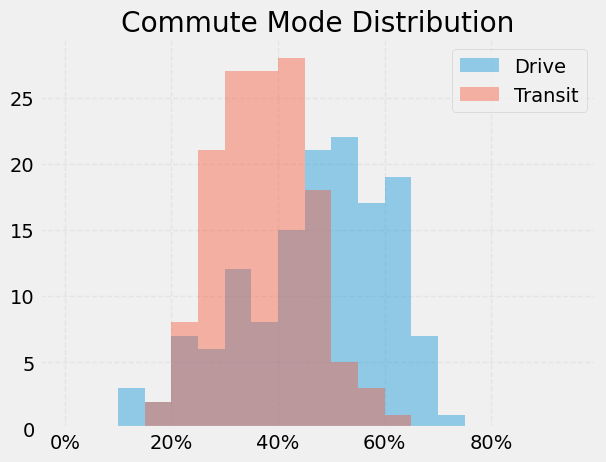

In [37]:
layer_fig, layer_ax = plt.subplots()

settings = {'alpha': 0.4, 'bins': np.arange(0, 1, .05)}

layer_ax.hist(neighbourhoods['pct_drive'], label='Drive', **settings)
layer_ax.hist(neighbourhoods['pct_transit'], label='Transit', **settings)
layer_ax.xaxis.set_major_formatter(tick.StrMethodFormatter('{x:.0%}'))
layer_ax.set_axisbelow(True)
layer_ax.grid(alpha=0.3, linestyle='--')
layer_ax.set_title('Commute Mode Distribution')
layer_ax.legend()
layer_ax

## More complex plots

Let's try plotting the number of reported bike thefts each year by whether the bike was recovered or not. We'll need to wrangle the theft data a bit to get counts by year and status. Then, we'll use the data to make a `stackplot()`. Finally, we'll style it.

In [29]:
# review the available columns
thefts_joined.columns

Index(['_id', 'objectid', 'event_unique_id', 'primary_offence',
       'occurrence_date', 'occurrence_year', 'occurrence_month',
       'occurrence_dayofweek', 'occurrence_dayofmonth', 'occurrence_dayofyear',
       'occurrence_hour', 'report_date', 'report_year', 'report_month',
       'report_dayofweek', 'report_dayofmonth', 'report_dayofyear',
       'report_hour', 'division', 'city', 'hood_id', 'neighbourhoodname',
       'location_type', 'premises_type', 'bike_make', 'bike_model',
       'bike_type', 'bike_speed', 'bike_colour', 'bike_cost', 'status',
       'objectid2', 'geometry', 'neighbourhood', 'n_id', 'designation',
       'pop_2016', 'pop_2011', 'pop_change', 'private_dwellings',
       'occupied_dwllings', 'pop_dens', 'area', 'total_commuters', 'drive',
       'car_passenger', 'transit', 'walk', 'bike', 'other', 'pct_bike'],
      dtype='object')

In [30]:
thefts_grouped = (thefts_joined
                  .groupby(['occurrence_year', 'status'])
                  .agg(thefts=('_id', 'count'))
                  .reset_index()  # make occurrence year a regular col
                  .pivot(index='occurrence_year', columns='status', values='thefts')
                  .reset_index()  # ...and again
                  .fillna(0))
thefts_grouped

status,occurrence_year,RECOVERED,STOLEN,UNKNOWN
0,2009,0.0,1.0,0.0
1,2010,0.0,2.0,0.0
2,2011,0.0,3.0,0.0
3,2012,0.0,2.0,0.0
4,2013,1.0,43.0,2.0
5,2014,50.0,2916.0,65.0
6,2015,43.0,3177.0,69.0
7,2016,49.0,3692.0,72.0
8,2017,43.0,3766.0,63.0
9,2018,49.0,3865.0,46.0


Text(0.5, 0, 'Year')

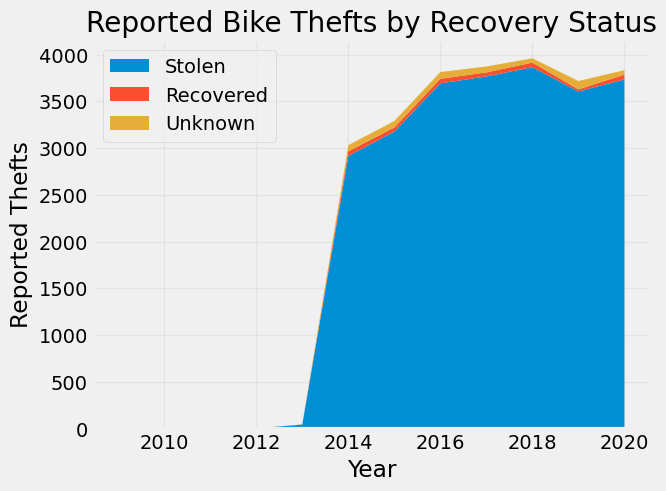

In [31]:
stfig, stax = plt.subplots()

stax.stackplot(thefts_grouped['occurrence_year'], thefts_grouped['STOLEN'],
        thefts_grouped['RECOVERED'], thefts_grouped['UNKNOWN'],
       labels=['Stolen', 'Recovered', 'Unknown'])
stax.set_axisbelow(True)
stax.grid(alpha=0.3)
stax.legend(loc='upper left')
stax.set_title('Reported Bike Thefts by Recovery Status')
stax.set_ylabel('Reported Thefts')
stax.set_xlabel('Year')

## Subplots

We can create multiple Axes in one Figure by passing `nrows` and `ncols` arguments to `subplots()`. The number of Axes we get equals `nrows` * `ncols`. Multiple Axes are returned as a `numpy` array.

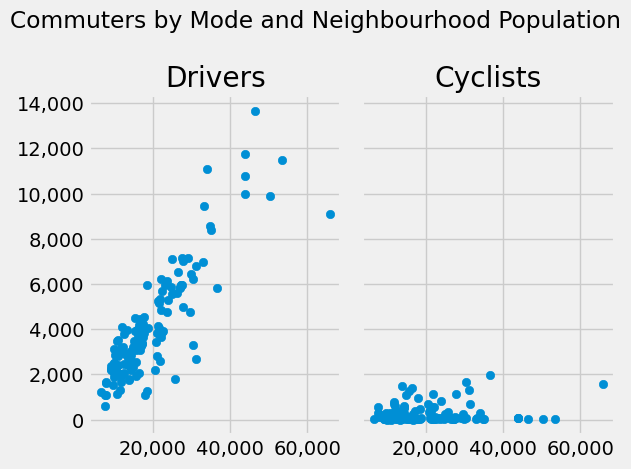

In [32]:
modefig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)
ax1.scatter(neighbourhoods['pop_2016'],
           neighbourhoods['drive'])
ax2.scatter(neighbourhoods['pop_2016'],
           neighbourhoods['bike'])
ax1.set_title('Drivers')
ax2.set_title('Cyclists')
ax1.yaxis.set_major_formatter(tick.StrMethodFormatter('{x:,.0f}'))
ax1.xaxis.set_major_formatter(tick.StrMethodFormatter('{x:,.0f}'))
ax2.xaxis.set_major_formatter(tick.StrMethodFormatter('{x:,.0f}'))
modefig.suptitle('Commuters by Mode and Neighbourhood Population')
modefig.tight_layout()

### Unpacking subplots

As the number of subplots grows, it gets cumbersome to unpack them in the assignment statement. We can temporarily assign all of them to a single variable.

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

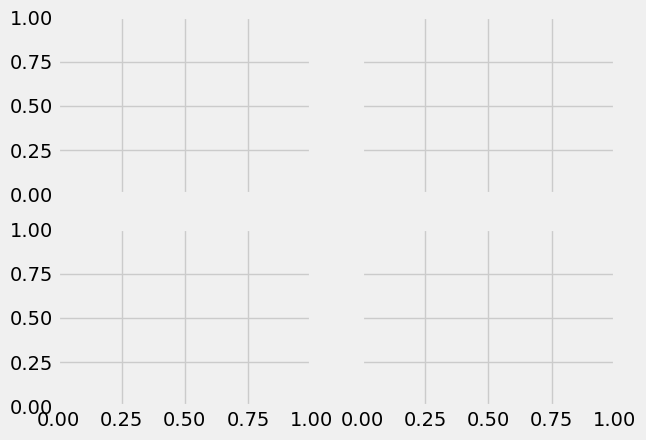

In [33]:
# make a 2x2 grid of subplots
modefig2, mode_ax = plt.subplots(nrows=2, ncols=2, sharey=True, sharex=True)
mode_ax

The Axes are arranged in a 2x2 array. It would be more straightforward to refer to them if we had a 1x4 array instead.

In [34]:
# accessing items in a 2x2 array can be annoying
mode_ax

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

In [35]:
# example: getting the bottom left Axes
mode_ax[1, 0]

<Axes: >

We can take advantage of `numpy` arrays' `flatten()` method. Recall that `flatten()` returns a new array with all the elements arranged in a single row. We can then unpack the elements of that row and assign them to individual variables.

In [36]:
# recall what flatten() does
mode_ax.flatten()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

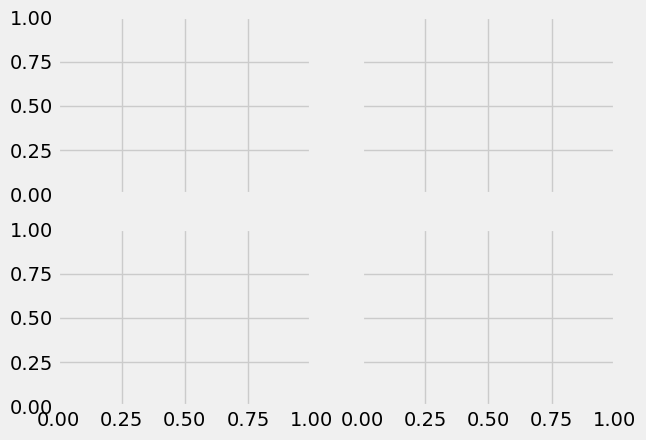

In [37]:
a1, a2, a3, a4 = mode_ax.flatten()
modefig2  # we haven't changed the Figure

### Plotting with helper functions

Plotting commute mode against total population four times will be tedious. To reuse code, we can write a helper function that takes an Axes, the mode we're plotting, and a dictionary of style parameters and updates the Axes. `**param_dict` unpacks the dictionary of parameters and arguments passed to `plot_modes()` and passes them on to `scatter()`.

In [38]:
def plot_modes(ax, mode, param_dict):
    '''
    Helper function to plot neighbourhood pop
    against commuting mode.
    '''
    defaults = {'alpha': 0.45, 's': 10} #'s' --> style
    defaults.update(param_dict)
    out = ax.scatter(neighbourhoods['pop_2016'],
                     neighbourhoods[mode],
                     **defaults)
    return out

Then, we can call `plot_modes` to plot each of the subplots.

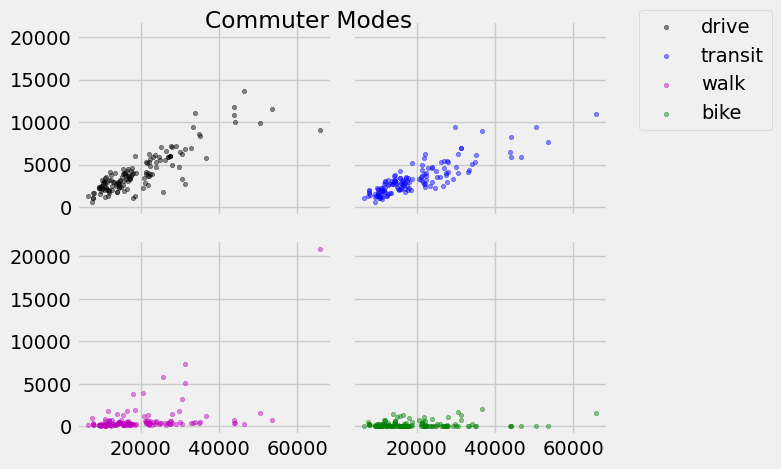

In [39]:
# add data to each axes
plot_modes(a1, 'drive', {'label': 'drive', 'facecolor': 'k'})
plot_modes(a2, 'transit', {'label': 'transit', 'facecolor': 'b'})
plot_modes(a3, 'walk', {'label': 'walk', 'facecolor': 'm'})
plot_modes(a4, 'bike', {'label': 'bike', 'facecolor': 'g'})
modefig2.legend(bbox_to_anchor=(1, 1), loc='upper left')
modefig2.tight_layout()
modefig2.suptitle('Commuter Modes')
modefig2

### Clearing plots

Successive method calls on an Axes object layer on graphics. To clear everything from an Axes, we can use its `clear()` method. To clear every subplot in a Figure, we can loop through the flattened array of Axes and `clear()` each Axes in turn.

In [40]:
for axes in mode_ax.flatten():
    axes.clear()

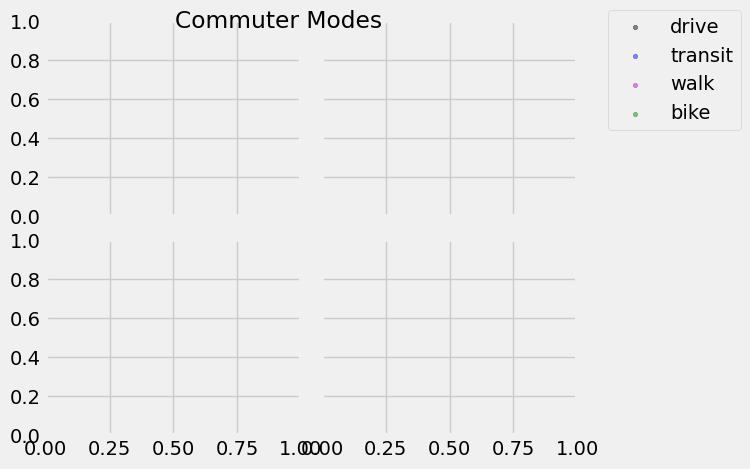

In [41]:
modefig2

In [42]:
# let's reset our style before moving on
plt.style.use('default')

# `seaborn`

## Easier plotting with `seaborn`

`seaborn` builds upon and complements `matplotlib`, producing nicer-looking Axes with less code, and giving us a few more convenient plot types. `seaborn` is typically given the alias `sns`, after a pop culture reference.

In [43]:
# If there are issues with library installation please type the following commands into Terminal:

# conda install seaborn

In [44]:
import seaborn as sns

With `seaborn`, we have two ways of structuring arguments to plotting functions:
* specifying the `x` and `y` axis columns
* specifying the `data` we are visualizing, then the `x` and `y` axis columns

<Axes: xlabel='pop_dens', ylabel='pct_transit'>

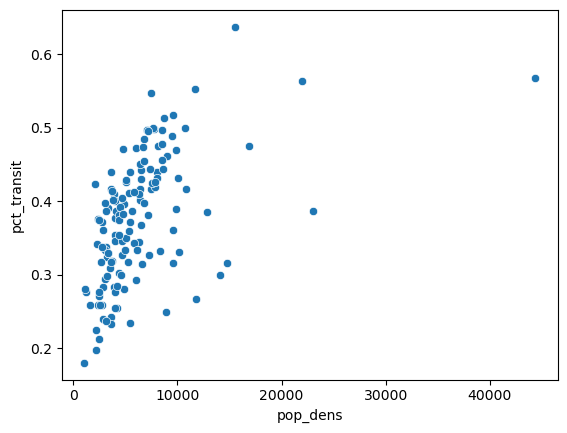

In [45]:
# use x and y axis columns
sns.scatterplot(x=neighbourhoods['pop_dens'],
                y=neighbourhoods['pct_transit'])

<Axes: xlabel='pop_dens', ylabel='pct_transit'>

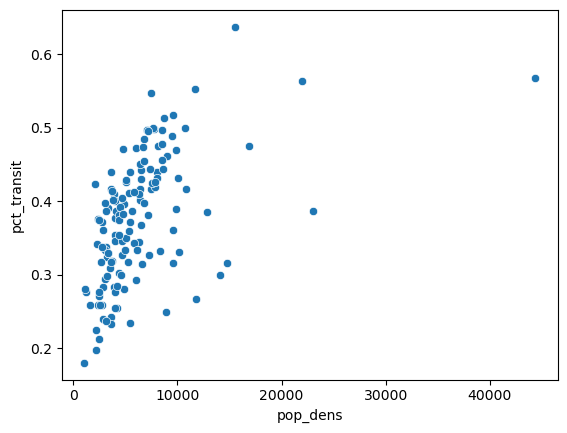

In [46]:
# use the dataframe and column names
sns.scatterplot(data=neighbourhoods,
                x='pop_dens',
                y='pct_transit')

For comparison, we can create the same plot using `matplotlib`'s `pyplot` approach.

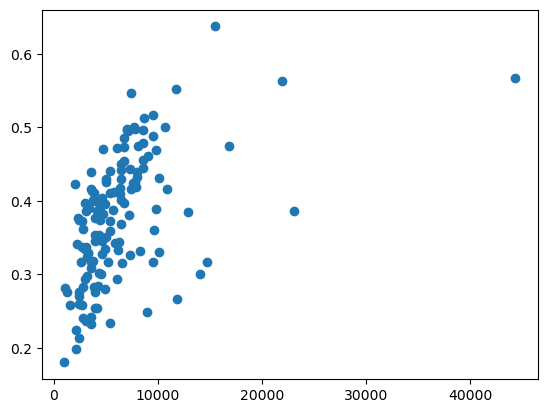

In [47]:
plt.scatter(neighbourhoods['pop_dens'],
            neighbourhoods['pct_transit'])

## `seaborn` and object-oriented `matplotlib`

We can use `seaborn` as a complement to `matplotlib`'s object-oriented approach. `seaborn` functions that work in individual plots have an optional keyword argument that lets us pass in an existing Axes to update. As a bonus, they return the Axes we're working with, making it easy to chain methods together.

Let's revisit our 10 biggest Toronto neighbourhoods chart.

This was the code to create that plot. We'll recreate it with `seaborn`.

```python
bar_fig, bar_ax = plt.subplots()
bar_ax.barh(top10_pop['neighbourhood'], top10_pop['pop_2016'])
bar_ax.xaxis.set_major_formatter('{x:,.0f}')
bar_ax.set_axisbelow(True)
bar_ax.grid(alpha=0.3)
bar_ax.set_title('Most Populous Toronto Neighbourhoods')
bar_ax.set_xlabel('Population, 2016')
```

In [48]:
top10_pop = neighbourhoods.sort_values('pop_2016', ascending=False).head(10)
top10_pop

,neighbourhood,n_id,designation,pop_2016,pop_2011,pop_change,private_dwellings,occupied_dwllings,pop_dens,area,total_commuters,drive,car_passenger,transit,walk,bike,other,pct_bike,pct_drive,pct_cp,pct_transit,pct_walk
123,Waterfront Communities-The Island,77,No Designation,65913,43361,0.520,47209,40756,8943,7.37,43785,9100,760,10915,20855,1570,610,0.035857,0.208,0.017,0.249,0.476
133,Woburn,137,NIA,53485,53350,0.003,19098,18436,4345,12.31,21595,11505,1405,7635,780,45,210,0.002084,0.533,0.065,0.354,0.036
130,Willowdale East,51,No Designation,50434,45041,0.120,23901,22304,10087,5.00,21785,9890,695,9390,1550,50,215,0.002295,0.454,0.032,0.431,0.071
106,Rouge,131,No Designation,46496,45912,0.013,13730,13389,1260,36.89,21500,13665,1510,5935,220,20,160,0.000930,0.636,0.070,0.276,0.010
66,L'Amoreaux,117,Emerging Neighbourhood,43993,44919,-0.021,15486,15037,6144,7.16,17715,10005,1220,5895,370,85,120,0.004798,0.565,0.069,0.333,0.021
59,Islington-City Centre West,14,No Designation,43965,38084,0.154,19911,19328,2712,16.21,22055,11775,975,8205,795,90,195,0.004081,0.534,0.044,0.372,0.036
74,Malvern,132,Emerging Neighbourhood,43794,45086,-0.029,13936,13426,4948,8.85,19225,10785,1400,6425,425,60,115,0.003121,0.561,0.073,0.334,0.022
33,Dovercourt-Wallace Emerson-Junction,93,No Designation,36625,34631,0.058,16248,15320,9819,3.73,19090,5825,820,8950,1215,1980,310,0.103719,0.305,0.043,0.469,0.064
34,Downsview-Roding-CFB,26,NIA,35052,34659,0.011,14244,13121,2337,15.00,16165,8405,1060,6085,460,10,145,0.000619,0.520,0.066,0.376,0.028
96,Parkwoods-Donalda,45,No Designation,34805,34617,0.005,13921,13315,4691,7.42,15270,8580,820,5275,420,45,115,0.002947,0.562,0.054,0.345,0.028


Text(0.5, 0, 'Population, 2016')

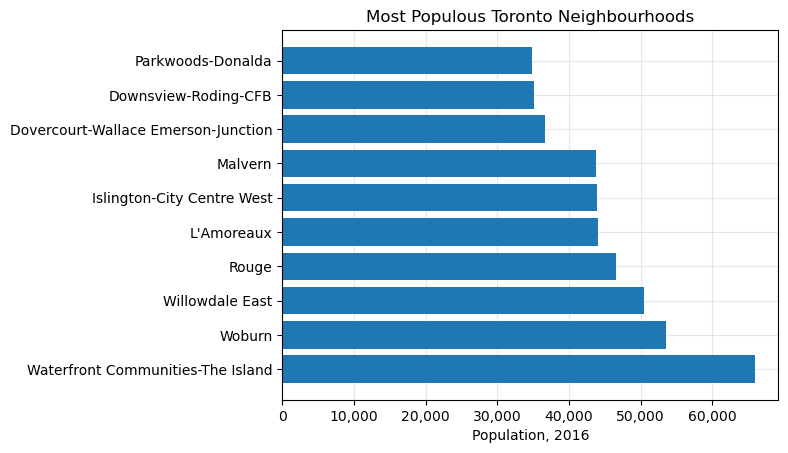

In [49]:
bar_fig, bar_ax = plt.subplots()
bar_ax.barh(top10_pop['neighbourhood'], top10_pop['pop_2016'])
bar_ax.xaxis.set_major_formatter(tick.StrMethodFormatter('{x:,.0f}'))
bar_ax.set_axisbelow(True)
bar_ax.grid(alpha=0.3)
bar_ax.set_title('Most Populous Toronto Neighbourhoods')
bar_ax.set_xlabel('Population, 2016')

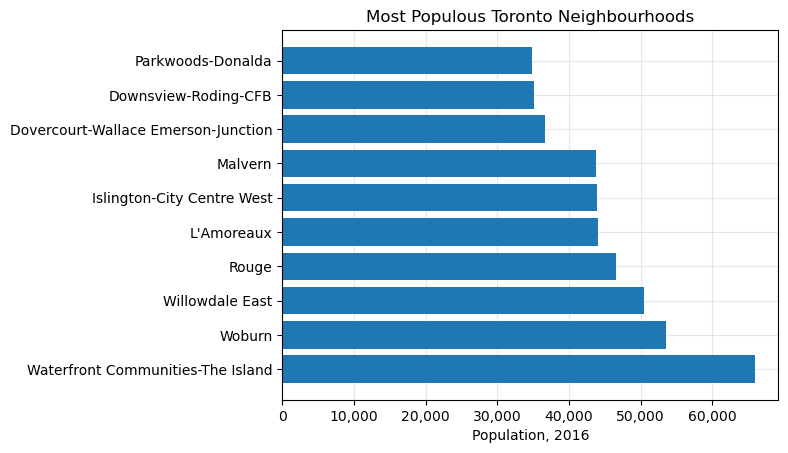

In [50]:
bar_fig

And with `seaborn`:

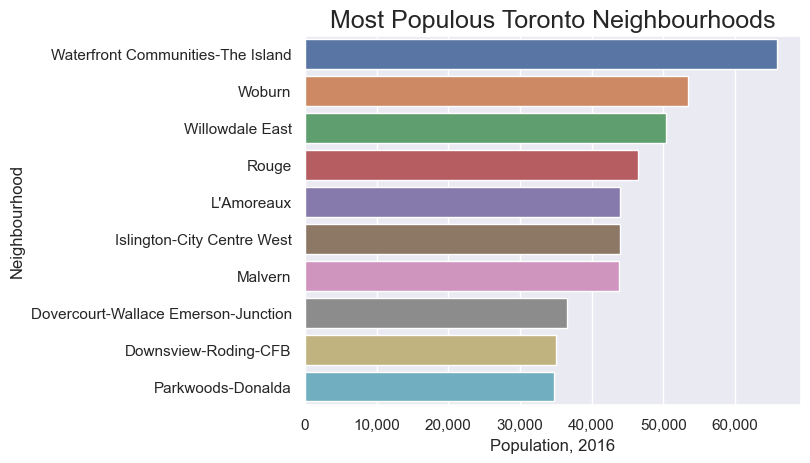

In [51]:
sns.set_theme()  # use seaborn's default style settings going forward

sns_fig, sns_ax = plt.subplots()  # create a Figure and Axes
(sns.barplot(data=top10_pop,  # set datasource
            x='pop_2016',  # for a horizontal bar graph
            y='neighbourhood',
            ax=sns_ax)  # plot on an existing Axes
 .set(xlabel='Population, 2016',
      ylabel='Neighbourhood'))

# .set() returns text, so we can't chain .set_title()
sns_ax.set_title('Most Populous Toronto Neighbourhoods',
                fontdict={'fontsize': 18})
sns_ax.xaxis.set_major_formatter(tick.StrMethodFormatter('{x:,.0f}'))

## Facets

With `matplotlib`, we created individual subplots and updated them with a helper function to visualize data for different categories. With `seaborn`, we can create a `FacetGrid` and then use its `map()` method to visualize data by category. `map()` takes the name of the plotting function to use, then the needed arguments, such as the columns to use for the x-axis and y-axis.

In [52]:
# reshape neighbourhood data to support faceting
neighbourhoods_reshaped = (neighbourhoods[['neighbourhood',
                                           'pct_transit',
                                           'pct_drive',
                                           'pct_walk',
                                           'pct_bike']]
                           .melt(id_vars='neighbourhood'))
neighbourhoods_reshaped.head()

,neighbourhood,variable,value
0,Agincourt North,pct_transit,0.283
1,Agincourt South-Malvern West,pct_transit,0.294
2,Alderwood,pct_transit,0.213
3,Annex,pct_transit,0.416
4,Banbury-Don Mills,pct_transit,0.258


/Users/kaylielau/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kaylielau/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kaylielau/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kaylielau/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

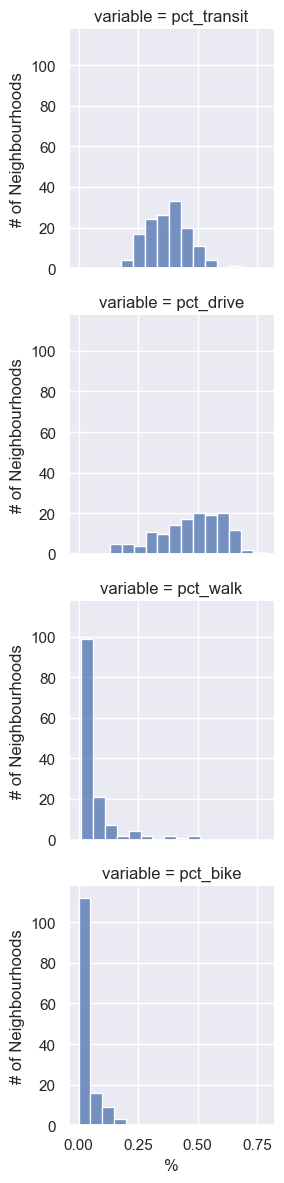

In [53]:
# specify the data to use and the column to facet by
# we'll give each variable its own row
facets = sns.FacetGrid(data=neighbourhoods_reshaped,
                       row='variable')

# create a histogram for each mode
facets.map(sns.histplot, 'value', binwidth=0.05)
facets.set_axis_labels('%', '# of Neighbourhoods')

For another example, we can plot reported bike thefts by year, faceted by status.

/Users/kaylielau/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kaylielau/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kaylielau/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kaylielau/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

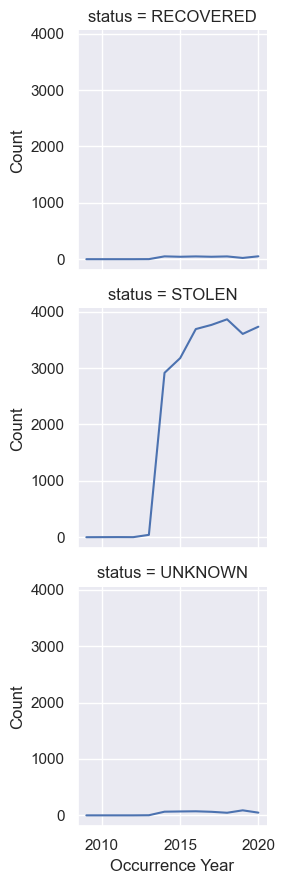

In [54]:
# reshape the theft counts to support faceting
theft_counts_long = thefts_grouped.melt(id_vars='occurrence_year',
                                        value_name='Count')

# specify the data to use and the column to facet by
# we'll give each status its own row
facets = sns.FacetGrid(data=theft_counts_long, row='status')

# for each status, create a lineplot of counts by year
facets.map(sns.lineplot, 'occurrence_year', 'Count')
facets.set_axis_labels('Occurrence Year')

### Visualization for EDA

`seaborn`'s pair plots are particularly useful for exploratory analyses. `pairplot()` takes a DataFrame or series of columns and creates a Figure containing grid of scatterplots, allowing us to visually look for relationships between variables.

In [55]:
# review the columns available
neighbourhoods.columns

Index(['neighbourhood', 'n_id', 'designation', 'pop_2016', 'pop_2011',
       'pop_change', 'private_dwellings', 'occupied_dwllings', 'pop_dens',
       'area', 'total_commuters', 'drive', 'car_passenger', 'transit', 'walk',
       'bike', 'other', 'pct_bike', 'pct_drive', 'pct_cp', 'pct_transit',
       'pct_walk'],
      dtype='object')

In [56]:
# review just the numeric columns
neighbourhoods.select_dtypes('number').columns

Index(['pop_2016', 'pop_2011', 'pop_change', 'private_dwellings',
       'occupied_dwllings', 'pop_dens', 'area', 'total_commuters', 'drive',
       'car_passenger', 'transit', 'walk', 'bike', 'other', 'pct_bike',
       'pct_drive', 'pct_cp', 'pct_transit', 'pct_walk'],
      dtype='object')

/Users/kaylielau/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kaylielau/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kaylielau/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kaylielau/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

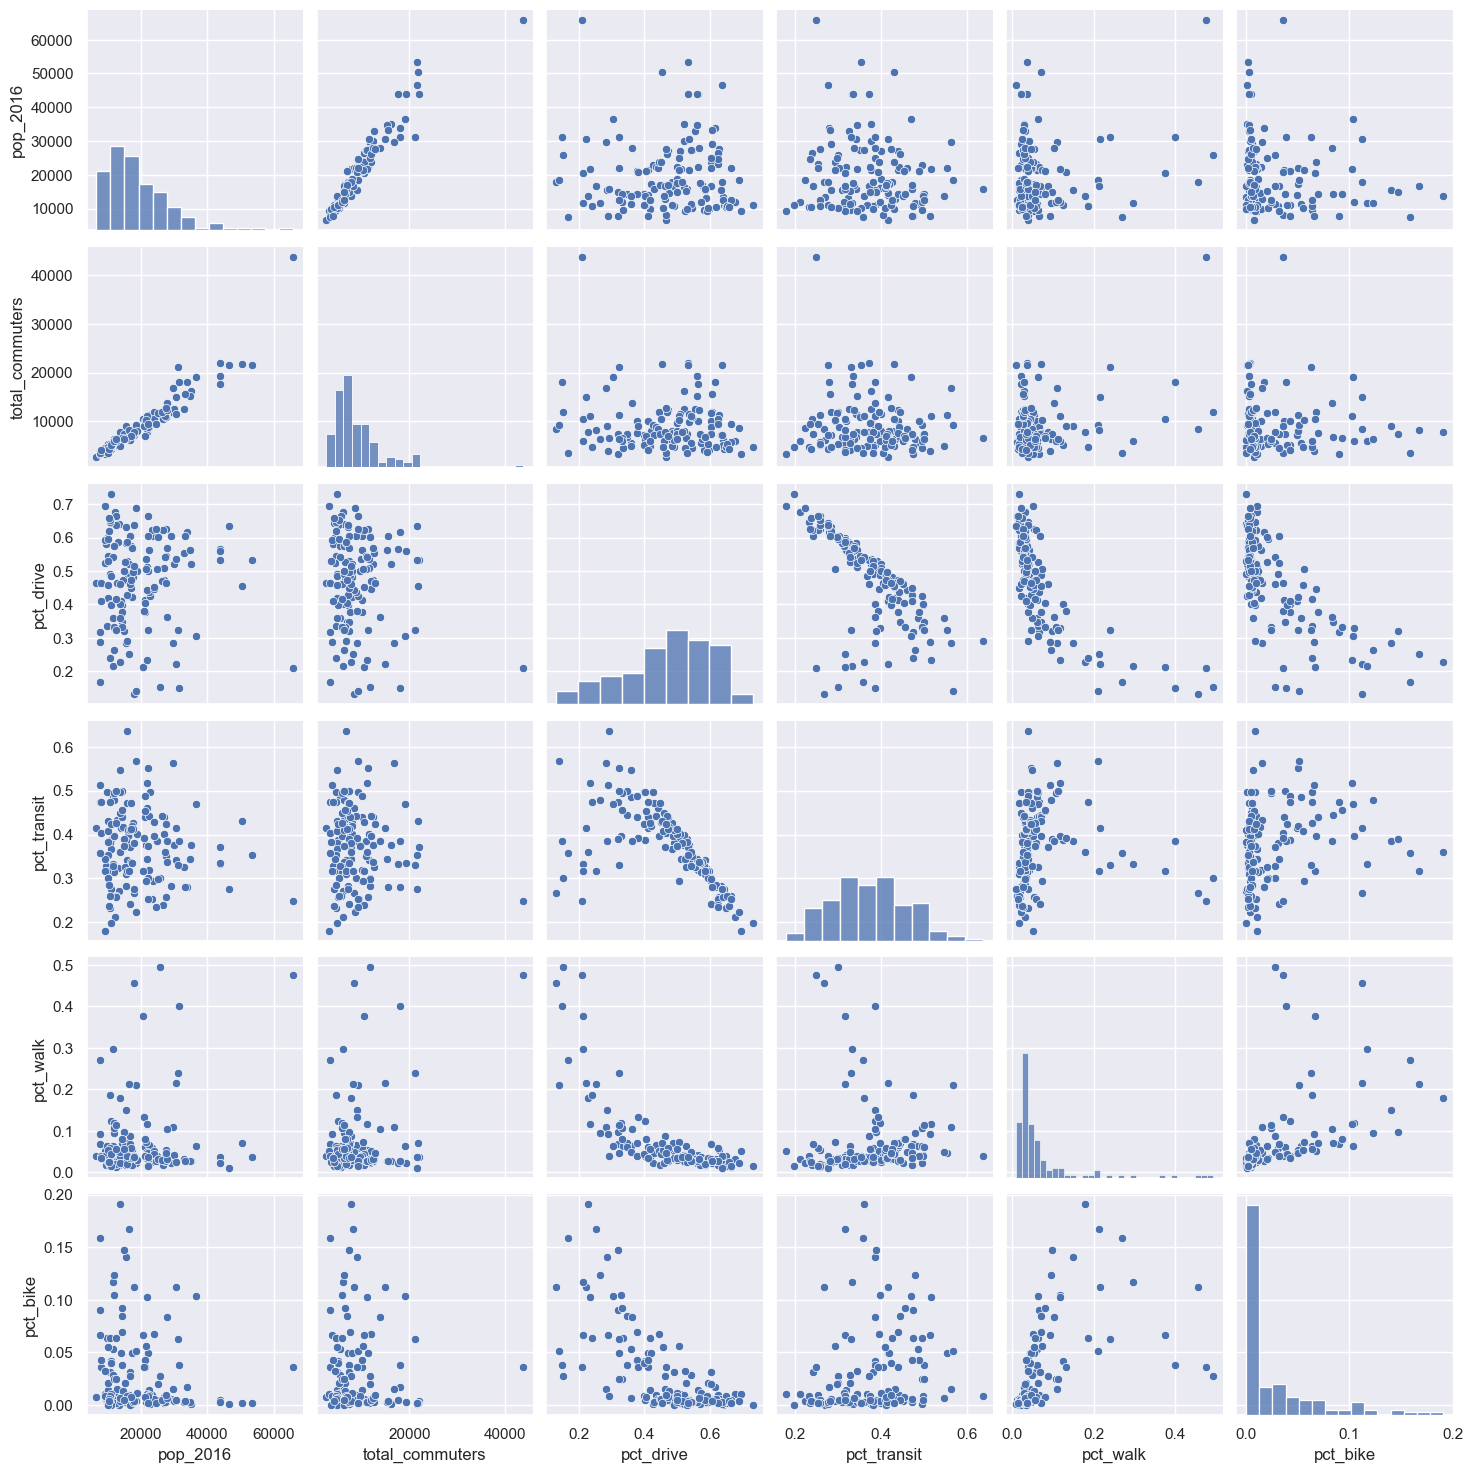

In [57]:
# select some columns to use in the pair plot
cols = ['pop_2016', 'total_commuters', 'pct_drive', 'pct_transit', 'pct_walk', 'pct_bike']
simple_pairs = sns.pairplot(neighbourhoods[cols])

/Users/kaylielau/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kaylielau/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kaylielau/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kaylielau/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

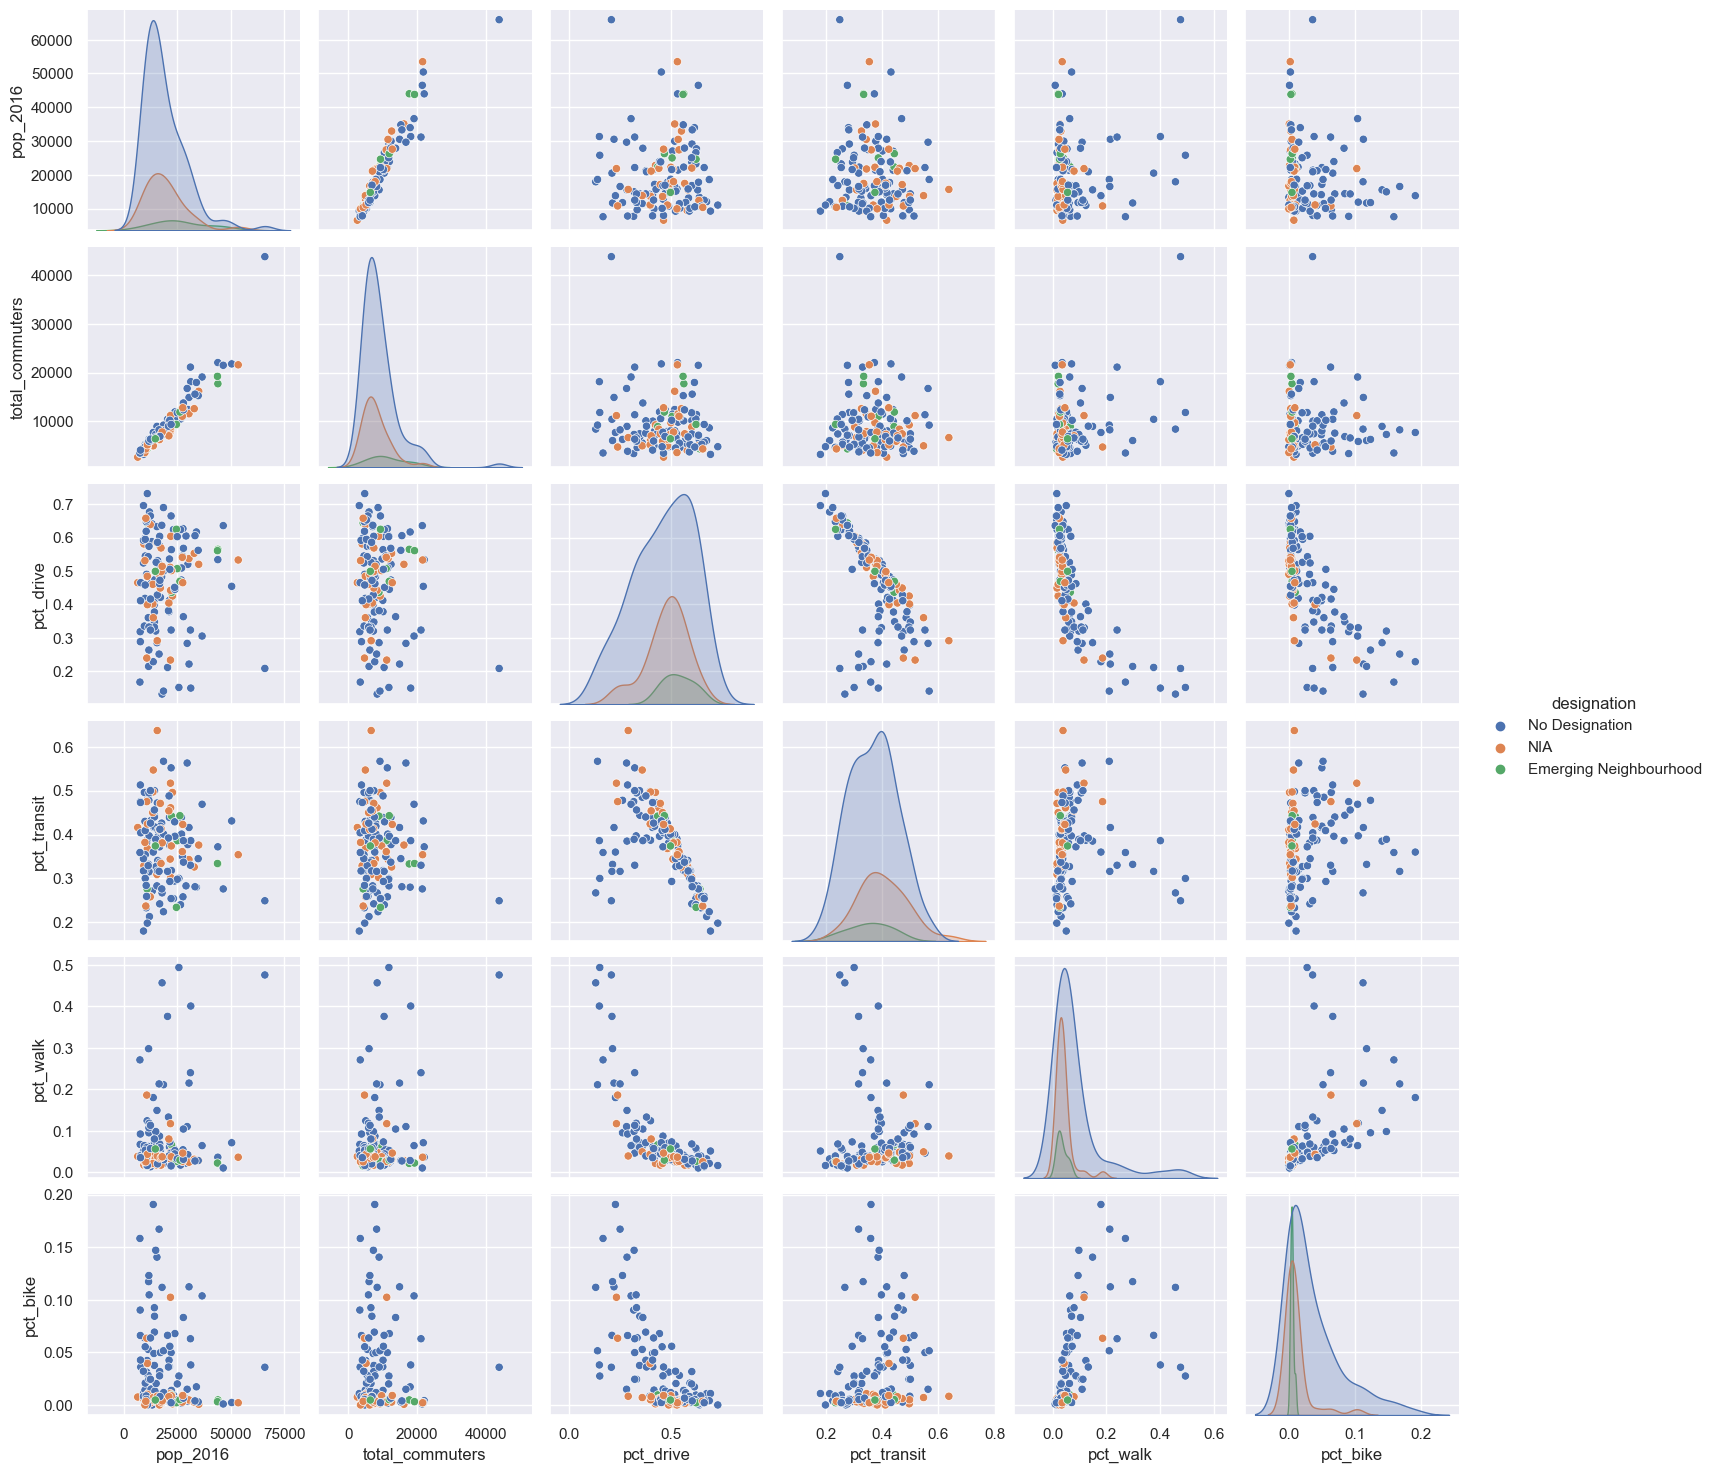

In [58]:
# if we include non-numeric variables, they won't be plotted, but we can use them for hue
cols = ['pop_2016', 'designation', 'total_commuters', 'pct_drive', 'pct_transit', 'pct_walk', 'pct_bike']
pairwise_fig = sns.pairplot(neighbourhoods[cols], hue='designation')

We can combine `seaborn`'s `heatmap()` function with the `pandas` Dataframe `corr()` method to explore correlations in our data.

In [59]:
# If there are issues with library installation please type the following commands into Terminal:

# conda install scipy

<Axes: >

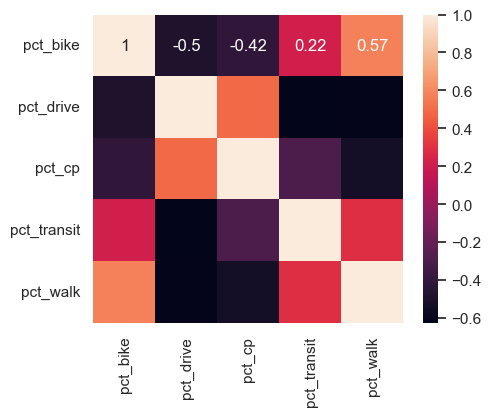

In [60]:
# calculate correlations with pandas
correlations = neighbourhoods.loc[:, 'pct_bike':].corr('kendall')

# create a figure and axes
corr_fig, corr_ax = plt.subplots()
corr_fig.set_size_inches(5, 4)
sns.heatmap(correlations, ax=corr_ax, annot=True)

## Saving Plots

To save a plot, use the Figure `savefig()` method, which supports exporting figure in common formats like PNG, PDF, and SVG. Setting `bbox_inches='tight'` will make `matplotlib` try to figure out the dimensions of the plot and crop the image appropriately. Note that `seaborn` does not have a plot saving function of its own.

In [61]:
pairwise_fig.savefig('pairs.svg', bbox_inches='tight')
corr_fig.savefig('correlations.png', bbox_inches='tight')

# `plotly`

## Interactive visualizations with `plotly`

`plotly` gives us a way to create interactive graphics within Python, building on the plotly.js library rather than `matplotlib`. Plotly Express provides an entry point to making data visualizations with the package. Let's re-create the drivers vs cyclists scatterplot to start.

In [62]:
# If there are issues with library installation please type the following commands into Terminal:

## conda install plotly
## conda install nbformat

In [63]:
import plotly.express as px

In [64]:
plotly_fig = px.scatter(neighbourhoods,
                        x='drive',
                        y='bike',
                        title='Commute Modes')
plotly_fig.show()  # ensure plot renders nicely in notebook mode

In [65]:
# add hover data
plotly_fig = px.scatter(neighbourhoods,
                        x='drive',
                        y='bike',
                        hover_name='neighbourhood',  # show neighbourhood on hover
                        labels={'bike': 'Bike', 'drive':'Drive'},
                        title='Commute Modes')
plotly_fig.show()  # ensure plot renders nicely in notebook mode

In [66]:
print(top10_pop.columns)

hist_fig = px.bar(top10_pop,
                  x=['pct_drive', 'pct_cp', 'pct_transit', 'pct_walk', 'pct_bike'],
                  y='neighbourhood',
                  hover_name='neighbourhood',
                  hover_data=['drive', 'car_passenger', 'transit', 'walk', 'bike'],
                  labels={'variable': 'Mode',
                          'value': '%'}
                 )
hist_fig.show()

Index(['neighbourhood', 'n_id', 'designation', 'pop_2016', 'pop_2011',
       'pop_change', 'private_dwellings', 'occupied_dwllings', 'pop_dens',
       'area', 'total_commuters', 'drive', 'car_passenger', 'transit', 'walk',
       'bike', 'other', 'pct_bike', 'pct_drive', 'pct_cp', 'pct_transit',
       'pct_walk'],
      dtype='object')


### Re-create the population bar chart

In [67]:
# view available themes
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [68]:
bar_fig = px.bar(top10_pop,
                 x='pop_2016',
                 y='neighbourhood',
                 text='pop_2016',
                 labels={'pop_2016': 'Population, 2016',
                         'neighbourhood': 'Neighbourhood'},
                 hover_data={'neighbourhood': False,
                             'pop_2016':False,
                             'pop_change': ':.2p'},  # add pop change, formatted as %
                 title='Top Toronto Neighbourhoods by Population',
                 template='seaborn'
                )
bar_fig.show()

## Futher customizing `plotly` graphs

For added control over visualizations, we can import `plotly`'s `graph_objects` submodule.

In [69]:
import plotly.graph_objects as go

In [70]:
transit_hist = go.Histogram(x=neighbourhoods['pct_transit'], name='Transit')
drive_hist = go.Histogram(x=neighbourhoods['pct_drive'], name='Drive')

data = [drive_hist, transit_hist]

layout = go.Layout(template='seaborn',
                  title='Commute Mode Distribution',
                  xaxis={'title': 'Mode %'},
                  yaxis={'title': 'Neighbourhoods'}
                  )

fig = go.Figure(data=data, layout=layout)
fig.update_layout(hovermode='x')
fig.show()

## Saving `plotly` visualizations

We can save visualizatons created in `plotly` to image or PDF with the `write_image()` Figure method. Note that `write_image()` needs the `kaleido` package to work.

In [71]:
# If there are issues with library installation please type the following commands into Terminal:

#conda install -c conda-forge python-kaleido=0.2.1

In [72]:
import kaleido

In [73]:
fig.write_image('fig.pdf', format='pdf')

# References

- Matplotlib development team. _Basic usage_. https://matplotlib.org/stable/tutorials/introductory/usage.html
- Matplotlib development team. _The lifecycle of a plot_. https://matplotlib.org/stable/tutorials/introductory/lifecycle.html#sphx-glr-tutorials-introductory-lifecycle-py
- Matplotlib development team. _API reference_. https://matplotlib.org/stable/api/index.html
- Plotly. _Getting started_. https://plotly.com/python/getting-started/
- Plotly. _Fundamentals_. https://plotly.com/python/plotly-fundamentals/
- Waskom, M. _An introduction to seaborn_. https://seaborn.pydata.org/introduction.html
- Waskom, M. _API reference_. https://seaborn.pydata.org/api.html
